<a href="https://colab.research.google.com/github/Diego990-tech/panel-con-Google-Looker-Studio/blob/main/EXAMEN_diego_gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contexto

En este trabajo usaremos con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv Credit contiene las siguientes variables:

    Income : Ingreso anual disponible en miles de dólares.
    Limit : Límite del crédito.
    Rating : Ranking del crédito.
    Cards : Cantidad de tarjetas de credito.
    Age : Edad del usuario.
    Education : Años de educación del usuario.
    Gender : ¿Hombre o mujer?
    Student : ¿Es estudiante?
    Married : ¿Está casado?
    Ethnicity : Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
    Balance : Promedio de deuda en tarjeta de crédito de usuario.



## Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels .
* Importe la base de datos `Credit.csv` y elimine la columna Unnamed: 0 .
* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity , genere binarias para AfricanAmerican y Asian.
    * tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.

Librerias Necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats


##Preprocesamiento

In [ ]:
ruta = '/content/Credit(1).csv'
df = pd.read_csv(ruta)

In [ ]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
df.isnull().sum()

,0
Income,0
Limit,0
Rating,0
Cards,0
Age,0
Education,0
Gender,0
Student,0
Married,0
Ethnicity,0


In [ ]:
df['African American'] = (df['Ethnicity'] == 'AfricanAmerican').astype(int)
df['Asian'] = (df['Ethnicity'] == 'Asian').astype(int)

In [ ]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0


In [ ]:
df_agrupado = df[['Balance', 'Income', 'Cards', 'Rating']]
df_agrupado

,Balance,Income,Cards,Rating
0,333,14.891,2,283
1,903,106.025,3,483
2,580,104.593,4,514
3,964,148.924,3,681
4,331,55.882,2,357
...,...,...,...,...
395,560,12.096,3,307
396,480,13.364,5,296
397,138,57.872,5,321
398,0,37.728,1,192


In [ ]:
def plot_hist(df_agrupado, column):
  mean = df[column].mean()
  median = df[column].median()
  plt.hist(df[column], bins=30, edgecolor='black')
  plt.axvline(mean, color='red', linestyle='dotted', linewidth=2, label='Media')
  plt.axvline(median, color='green', linestyle='dotted', linewidth=2, label='Mediana')
  plt.title(f'Historigrama de {column}')
  plt.xlabel(column)
  plt.ylabel('Cantidad')
  plt.legend()
  plt.show()

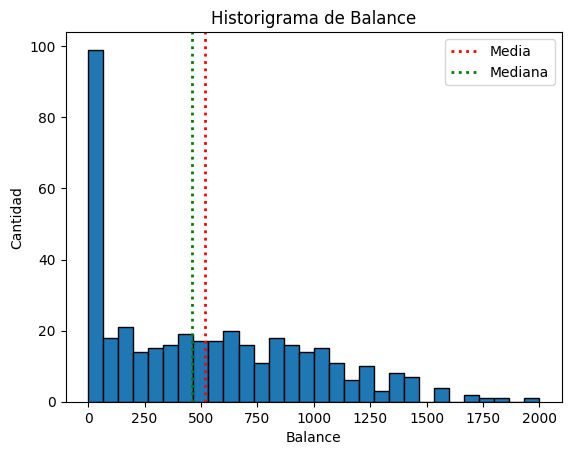

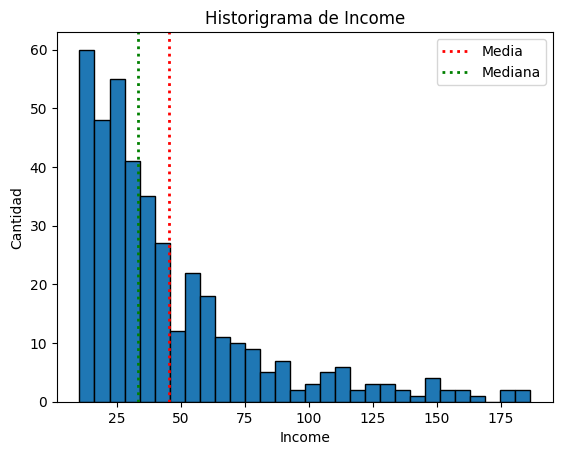

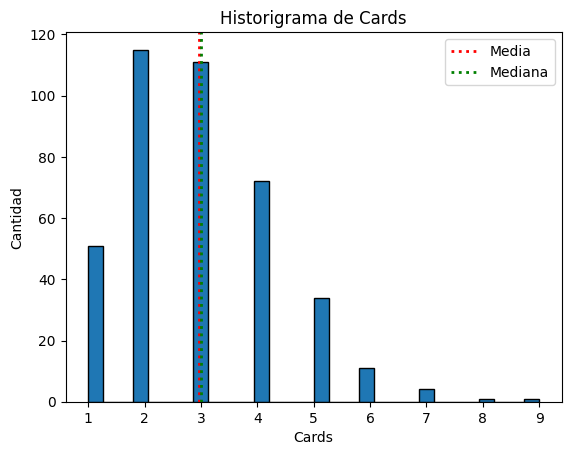

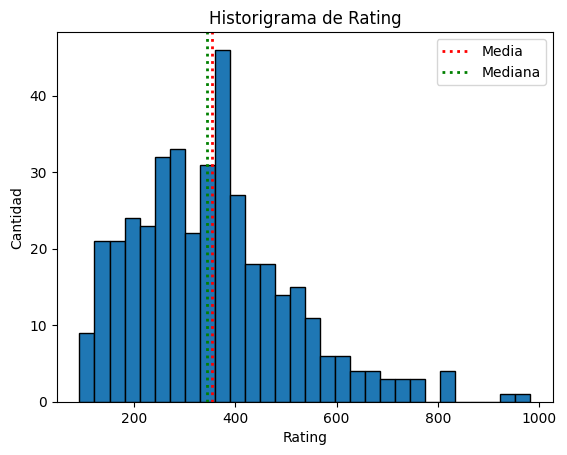

In [ ]:
plot_hist(df_agrupado, 'Balance')
plot_hist(df_agrupado, 'Income')
plot_hist(df_agrupado, 'Cards')
plot_hist(df_agrupado, 'Rating')

In [ ]:
# -Balance: La distribución del balance se inclina hacia la derecha, lo que indica que la mayoría de las personas tienen saldos relativamente bajos, mientras que un número menor tiene saldos mucho más altos
# -Income: La distribución de los ingresos también está sesgada hacia la derecha, lo que indica que la mayoría de las personas tienen ingresos relativamente bajos
# -Cards: Se concentra la media y mediana en 110 aproximadamente con tres targetas promedio por persona, y con una tendencia a la baja resultando la cantidad de 2 targetas el valor maximo de encuestados
# -Rating: La mayoría de los elementos evaluados tienen ratings relativamente bajos o promedio. Sin embargo, existe un grupo más pequeño de elementos que tienen ratings excepcionalmente altos

In [ ]:
# Crear instancia de la clase Preprocesamiento con los pasos necesarios
preproc = Preprocesamiento(['extraer_datos', 'verificar_categoricas', 'visualizar_categoricas','generar_binarias', 'eliminar_binarias_redundantes','visualizar_datos'])

NameError: name 'Preprocesamiento' is not defined

##  Genere gráficos descriptivos para las variables contínuas

* Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
* ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?